In [1]:
import torch
import torchvision
import torchvision.datasets as datasets

In [2]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=None)


Extracting ./data\cifar-10-python.tar.gz to ./data


In [3]:
cifar_trainset = datasets.CIFAR100(root='./data', train=True, download=True, transform=None)


Extracting ./data\cifar-100-python.tar.gz to ./data


In [4]:
import matplotlib.pyplot as plt


In [26]:
plt.imshow(cifar_trainset[0]["tank"])

TypeError: tuple indices must be integers or slices, not str

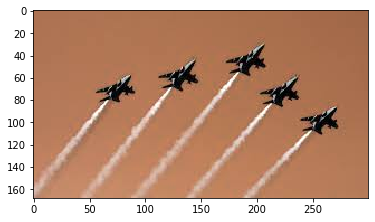

In [30]:
import cv2
import os
import numpy as np
img = cv2.imread('C:/Users/Suraj/PycharmProjects/problem_statement_1/dataset/01.jpg')
plt.imshow(img)

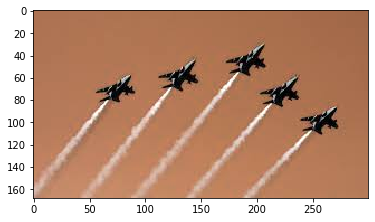

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/Suraj/PycharmProjects/problem_statement_1/dataset"

CATEGORIES = ["military_targets", "non_military_targets"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    
    break  #...and one more!

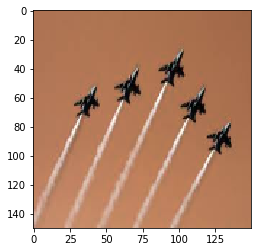

In [80]:
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [87]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=military 1=non_military

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 579.59it/s]

80


In [88]:
import random

random.shuffle(training_data)

1
0
0
0
0
1
0
0
0
1


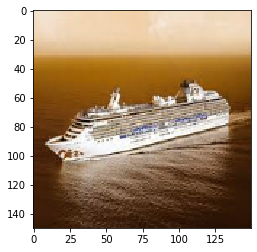

In [106]:
for sample in training_data[:10]:
    print(sample[1])
    plt.imshow(sample[0])

In [110]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X.shape


(80, 150, 150, 3)

In [111]:
len(y)

80

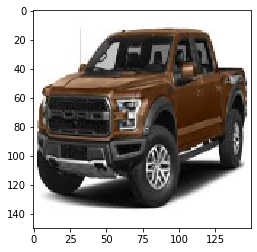

In [112]:
plt.imshow(X[0])

In [113]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [114]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [120]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
y= np.array(y)

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.05)

Epoch 1/10
3/3 [==============================] - 14s 5s/step - loss: 19.3385 - accuracy: 0.5263 - val_loss: 9.2380 - val_accuracy: 0.7500
Epoch 2/10
3/3 [==============================] - 14s 5s/step - loss: 13.2843 - accuracy: 0.4868 - val_loss: 0.5617 - val_accuracy: 0.7500
Epoch 3/10
3/3 [==============================] - 14s 5s/step - loss: 1.1423 - accuracy: 0.4868 - val_loss: 0.6825 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 14s 5s/step - loss: 0.8174 - accuracy: 0.5132 - val_loss: 0.7374 - val_accuracy: 0.2500
Epoch 5/10
3/3 [==============================] - 14s 5s/step - loss: 0.7704 - accuracy: 0.5132 - val_loss: 0.7585 - val_accuracy: 0.2500
Epoch 6/10
3/3 [==============================] - 14s 5s/step - loss: 0.6775 - accuracy: 0.5526 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 14s 5s/step - loss: 0.6239 - accuracy: 0.8026 - val_loss: 0.7610 - val_accuracy: 0.2500
Epoch 8/10
3/3 [================